# Importing Libraries

In [1]:
import torch
from torch import nn
import torch.nn.functional as F
from torchvision import datasets, transforms

import numpy as np

import requests

import matplotlib as mpl
import matplotlib.gridspec as gridspec
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

from PIL import Image, ImageOps

import reprlib
import sys

# Configuring Visualization Parameters

In [2]:
%matplotlib inline

In [3]:
XINHUI = "#7a7374"
XUEBAI = "#fffef9"
YINBAI = "#f1f0ed"
YINHUI = "#918072"

figure_size = (16, 9)

In [4]:
custom_params = {
    "axes.axisbelow": True,
    "axes.edgecolor": YINBAI,
    "axes.facecolor": XUEBAI,
    "axes.grid": True,
    "axes.labelcolor": XINHUI,
    "axes.spines.right": False,
    "axes.spines.top": False,
    "axes.titlecolor": XINHUI,
    "figure.edgecolor": YINBAI,
    "figure.facecolor": XUEBAI,
    "grid.alpha": .8,
    "grid.color": YINBAI,
    "grid.linestyle": "--",
    "grid.linewidth": 1.2,
    "legend.edgecolor": YINHUI,
    "patch.edgecolor": XUEBAI,
    "patch.force_edgecolor": True,
    "text.color": XINHUI,
    "xtick.color": YINHUI,
    "ytick.color": YINHUI,
}

mpl.rcParams.update(custom_params)

# Configuring Other Notebook Parameters

In [5]:
reprlib_rules = reprlib.Repr()
reprlib_rules.maxother = 250

# Pre-installing Custom Functions

In [6]:
sys.path.append("../")

In [7]:
from Modules import *

# Practicing in Stages

## Image Transforms

In [8]:
transform = transforms.Compose([
    transforms.Resize((28, 28)),
    transforms.ToTensor(),
    transforms.Normalize((0.5, ), (0.5, ))
])

training_dataset = datasets.MNIST(root="../Datasets",
                                  train=True,
                                  download=True,
                                  transform=transform)

tabulation = Form_Generator()
tabulation.heading_printer(
    "Loading and transformation of the MNIST training dataset")

statements = [
    """
transform = transforms.Compose([
    transforms.Resize((28, 28)),
    transforms.ToTensor(),
    transforms.Normalize((0.5, ), (0.5, ))
])

training_dataset = datasets.MNIST(root="../Datasets",
                                  train=True,
                                  download=True,
                                  transform=transform)
"""
]
tabulation.long_statement_generator(statements)

variables = ["transform", "training_dataset"]
values = [str(transform), str(reprlib_rules.repr(training_dataset))]
tabulation.variable_generator(variables, values)

expressions = [
    "len(training_dataset)",
]
results = [str(len(training_dataset))]
tabulation.expression_generator(expressions, results)

Loading and transformation of the MNIST training dataset

    +-------------------------------------------------------+
    | Statement                                             |
    +-------------------------------------------------------+
    | transform = transforms.Compose([                      |
    |     transforms.Resize((28, 28)),                      |
    |     transforms.ToTensor(),                            |
    |     transforms.Normalize((0.5, ), (0.5, ))            |
    | ])                                                    |
    |                                                       |
    | training_dataset = datasets.MNIST(root="../Datasets", |
    |     train=True,                                       |
    |     download=True,                                    |
    |     transform=transform)                              |
    +-------------------------------------------------------+
    +------------------+----------------------------------------+
    | Va

In [9]:
training_loader = torch.utils.data.DataLoader(training_dataset,
                                              batch_size=100,
                                              shuffle=True)

tabulation = Form_Generator()
tabulation.heading_printer("Configuration of the training batches")

statements = [
    """
training_loader = torch.utils.data.DataLoader(training_dataset,
                                              batch_size=100,
                                              shuffle=True)
"""
]
tabulation.long_statement_generator(statements)

expressions = [
    "len(training_loader)", "len(training_loader.dataset)",
    "list(training_loader)[0][0].shape", "list(training_loader)[0][1].shape",
    "next(iter(training_loader))[0].shape",
    "next(iter(training_loader))[1].shape"
]
results = [
    str(len(training_loader)),
    str(len(training_loader.dataset)),
    str(list(training_loader)[0][0].shape),
    str(list(training_loader)[0][1].shape),
    str(next(iter(training_loader))[0].shape),
    str(next(iter(training_loader))[1].shape),
]
tabulation.expression_generator(expressions, results, 12)

Configuration of the training batches

    +---------------------------------------------------+
    | Statement                                         |
    +---------------------------------------------------+
    | training_loader =                                 |
    |     torch.utils.data.DataLoader(training_dataset, |
    |     batch_size=100,                               |
    |     shuffle=True)                                 |
    +---------------------------------------------------+
    +--------------------------------------+----------------------+
    | Expression                           | Result               |
    +--------------------------------------+----------------------+
    | len(training_loader)                 | 600                  |
    | len(training_loader.dataset)         | 60000                |
    | list(training_loader)[0][0].shape    | torch.Size([100, 1,  |
    |                                      |             28, 28]) |
    | list(training_l

In [10]:
def im_convert(tensor):
    image = tensor.clone().detach().numpy()
    image = image.transpose(1, 2, 0)
    image = image * np.array((0.5, 0.5, 0.5)) + np.array((0.5, 0.5, 0.5))
    image = image.clip(0, 1)
    return image


def image_to_scalar_data(tensor):
    image = tensor.clone().detach().numpy()
    image = image.transpose(1, 2, 0)
    image = image.reshape(image.shape[0], -1)
    image = image * 0.5 + 0.5
    image = image.clip(0, 1)
    return image


tabulation = Form_Generator()
tabulation.heading_printer("Functions definition to convert tensor to image")

definitions = [
    """
def im_convert(tensor):
    image = tensor.clone().detach().numpy()
    image = image.transpose(1, 2, 0)
    image = image * np.array((0.5, 0.5, 0.5)) + np.array((0.5, 0.5, 0.5))
    image = image.clip(0, 1)
    return image


def image_to_scalar_data(tensor):
    image = tensor.clone().detach().numpy()
    image = image.transpose(1, 2, 0)
    image = image.reshape(image.shape[0], -1)
    image = image * 0.5 + 0.5
    image = image.clip(0, 1)
    return image
"""
]

tabulation.definition_generator(definitions)

Functions definition to convert tensor to image

    +-------------------------------------------------+
    | Definition                                      |
    +-------------------------------------------------+
    | def im_convert(tensor):                         |
    |     image = tensor.clone().detach().numpy()     |
    |     image = image.transpose(1, 2, 0)            |
    |     image = image * np.array((0.5, 0.5, 0.5)) + |
    |     np.array((0.5, 0.5, 0.5))                   |
    |     image = image.clip(0, 1)                    |
    |     return image                                |
    |                                                 |
    |                                                 |
    | def image_to_scalar_data(tensor):               |
    |     image = tensor.clone().detach().numpy()     |
    |     image = image.transpose(1, 2, 0)            |
    |     image = image.reshape(image.shape[0], -1)   |
    |     image = image * 0.5 + 0.5                   |

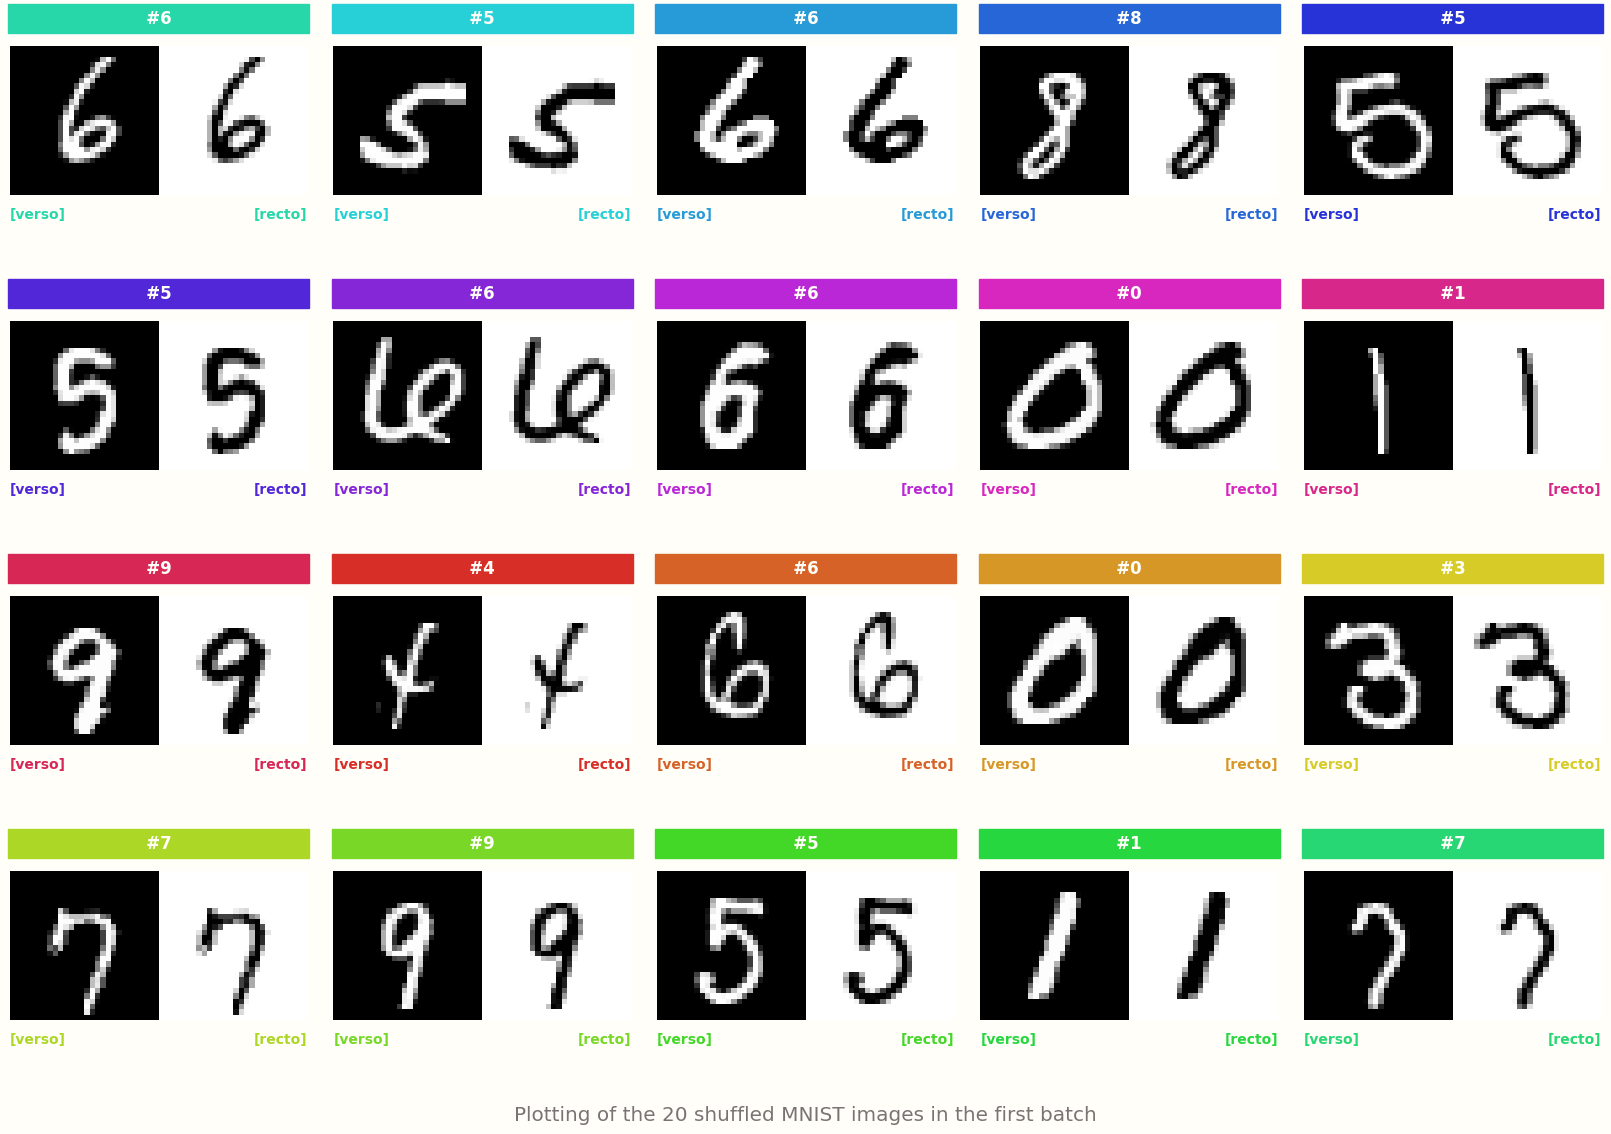

In [11]:
colors = calm_color_generator(20)
fig = plt.figure(figsize=(figure_size[0], figure_size[1] / 9 * 11),
                 constrained_layout=True)

gs = gridspec.GridSpec(nrows=4, ncols=5, figure=fig, wspace=.08, hspace=None)

dataiter = iter(training_loader)
images, labels = next(dataiter)

for idx in np.arange(20):
    bgcolor = colors.pop(0)
    ax = fig.add_subplot(gs[idx // 5, idx % 5],
                         xticks=[],
                         yticks=[],
                         frameon=False)
    spaces = " " * 23
    ax.set_title("{}#{}{}".format(spaces, str(labels[idx].item()), spaces),
                 loc="center",
                 pad=0,
                 backgroundcolor=bgcolor,
                 color=plt.rcParams["axes.facecolor"],
                 fontweight="heavy")

    axins1 = inset_axes(ax,
                        width="50%",
                        height="75%",
                        loc="upper left",
                        borderpad=0)
    axins1.set(xticks=[], yticks=[], frame_on=False)
    axins1.imshow(im_convert(images[idx]))
    axins1.set_xlabel("[verso]",
                      loc="left",
                      labelpad=5,
                      color=bgcolor,
                      fontweight="bold")

    axins2 = inset_axes(ax,
                        width="50%",
                        height="75%",
                        loc="upper right",
                        borderpad=0)
    axins2.set(xticks=[], yticks=[], frame_on=False)
    axins2.imshow(image_to_scalar_data(images[idx]), cmap="binary")
    axins2.set_xlabel("[recto]",
                      loc="right",
                      labelpad=5,
                      color=bgcolor,
                      fontweight="bold")

fig.suptitle("Plotting of the 20 shuffled MNIST images in the first batch",
             fontsize="x-large",
             x=0.5,
             y=0)

plt.show()

## Neural Network Implementation

In [12]:
class Classifier(nn.Module):

    def __init__(self, D_in, H1, H2, D_out):
        super().__init__()
        self.linear1 = nn.Linear(D_in, H1)
        self.linear2 = nn.Linear(H1, H2)
        self.linear3 = nn.Linear(H2, D_out)

    def forward(self, x):
        x = F.relu(self.linear1(x))
        x = F.relu(self.linear2(x))
        x = self.linear3(x)
        return x


model = Classifier(784, 125, 65, 10)

tabulation = Form_Generator()
tabulation.heading_printer("Initialization of custom neural module class")

definitions = [
    """
class Classifier(nn.Module):

    def __init__(self, D_in, H1, H2, D_out):
        super().__init__()
        self.linear1 = nn.Linear(D_in, H1)
        self.linear2 = nn.Linear(H1, H2)
        self.linear3 = nn.Linear(H2, D_out)

    def forward(self, x):
        x = F.relu(self.linear1(x))
        x = F.relu(self.linear2(x))
        x = self.linear3(x)
        return x
"""
]
tabulation.definition_generator(definitions)

statements = ["model = Classifier(784, 125, 65, 10)"]
tabulation.statement_generator(statements)

variables = ["model"]
values = [str(model)]
tabulation.variable_generator(variables, values)

Initialization of custom neural module class

    +----------------------------------------------+
    | Definition                                   |
    +----------------------------------------------+
    | class Classifier(nn.Module):                 |
    |                                              |
    |     def __init__(self, D_in, H1, H2, D_out): |
    |         super().__init__()                   |
    |         self.linear1 = nn.Linear(D_in, H1)   |
    |         self.linear2 = nn.Linear(H1, H2)     |
    |         self.linear3 = nn.Linear(H2, D_out)  |
    |                                              |
    |     def forward(self, x):                    |
    |         x = F.relu(self.linear1(x))          |
    |         x = F.relu(self.linear2(x))          |
    |         x = self.linear3(x)                  |
    |         return x                             |
    +----------------------------------------------+
    +--------------------------------------+
    | St

In [13]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

tabulation = Form_Generator()
tabulation.heading_printer(
    "Specific configuration settings for the training process")

statements = [
    """
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)
"""
]
tabulation.statement_generator(statements)

variables = ["criterion", "optimizer"]
values = [str(criterion), str(optimizer)]
tabulation.variable_generator(variables, values)

Specific configuration settings for the training process

    +-----------------------------------------------------------+
    | Statement                                                 |
    +-----------------------------------------------------------+
    | criterion = nn.CrossEntropyLoss()                         |
    | optimizer = torch.optim.Adam(model.parameters(), lr=0.01) |
    +-----------------------------------------------------------+
    +-----------+---------------------------+
    | Variable  | Value                     |
    +-----------+---------------------------+
    | criterion | CrossEntropyLoss()        |
    | optimizer | Adam (                    |
    |           | Parameter Group 0         |
    |           |     amsgrad: False        |
    |           |     betas: (0.9, 0.999)   |
    |           |     capturable: False     |
    |           |     differentiable: False |
    |           |     eps: 1e-08            |
    |           |     foreach: None     

In [14]:
epochs = 15
running_loss_history = []
running_accu_history = []

dataframe = DataFrame_Generator("epoch", "loss", "accuracy")

for e in range(epochs):
    running_loss = 0.0
    running_accu = 0

    for inputs, labels in training_loader:
        inputs = inputs.view(inputs.shape[0], -1)
        outputs = model(inputs)
        loss = criterion(outputs, labels)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        _, preds = torch.max(outputs, 1)
        running_loss += loss.item()
        running_accu += torch.sum(preds == labels.data)

    else:
        epoch_loss = running_loss / len(training_loader)
        epoch_accu = running_accu.float() / len(training_loader)
        running_loss_history.append(epoch_loss)
        running_accu_history.append(epoch_accu.item())

        dataframe.updater(e + 1, epoch_loss, epoch_accu.item())

tabulation = Form_Generator()
tabulation.heading_printer("Model training for a specific number of epochs")

statements = [
    """
epochs = 15
running_loss_history = []
running_accu_history = []

for e in range(epochs):
    running_loss = 0.0
    running_accu = 0

    for inputs, labels in training_loader:
        inputs = inputs.view(inputs.shape[0], -1)
        outputs = model(inputs)
        loss = criterion(outputs, labels)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        _, preds = torch.max(outputs, 1)
        running_loss += loss.item()
        running_accu += torch.sum(preds == labels.data)

    else:
        epoch_loss = running_loss / len(training_loader)
        epoch_accu = running_accu.float() / len(training_loader)
        running_loss_history.append(epoch_loss)
        running_accu_history.append(epoch_accu.item())
"""
]
tabulation.statement_generator(statements)

variables = ["epochs", "running_loss_history", "running_accu_history"]
values = [
    str(epochs),
    str(
        reprlib_rules.repr(
            ["{:.4f}".format(loss) for loss in running_loss_history])),
    str(
        reprlib_rules.repr(
            ["{:.4f}".format(accu) for accu in running_accu_history]))
]
tabulation.variable_generator(variables, values, expandtabs=1)

df_table = dataframe.tabulation()
tabulation.dataframe_generator(df_table)

Model training for a specific number of epochs

    +----------------------------------------------------------+
    | Statement                                                |
    +----------------------------------------------------------+
    | epochs = 15                                              |
    | running_loss_history = []                                |
    | running_accu_history = []                                |
    |                                                          |
    | for e in range(epochs):                                  |
    |     running_loss = 0.0                                   |
    |     running_accu = 0                                     |
    |                                                          |
    |     for inputs, labels in training_loader:               |
    |         inputs = inputs.view(inputs.shape[0], -1)        |
    |         outputs = model(inputs)                          |
    |         loss = criterion(outputs, la

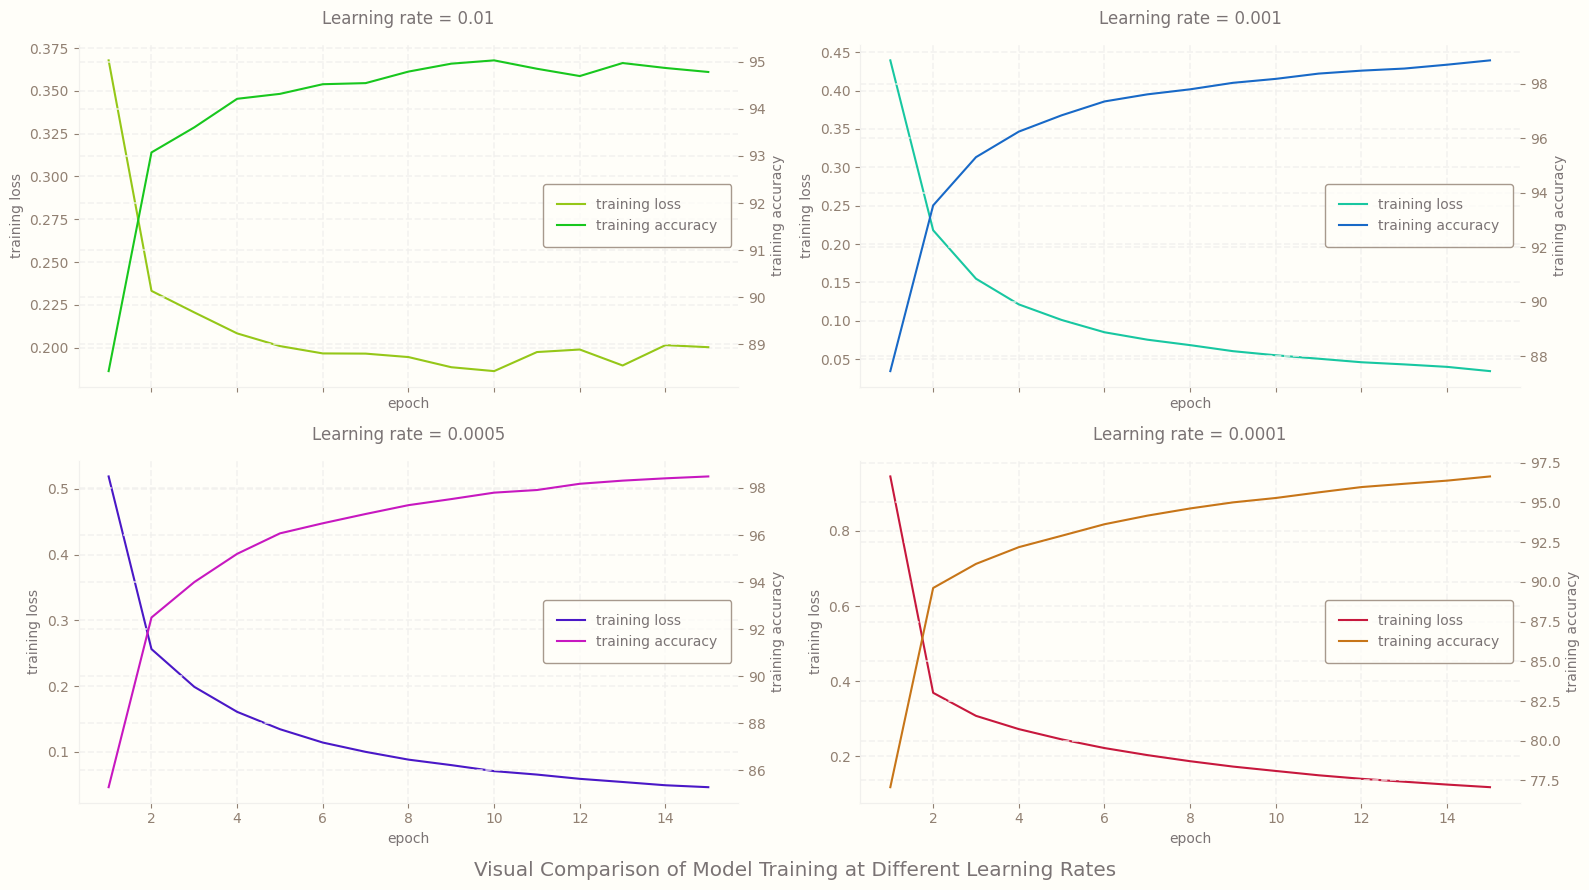

In [15]:
def loader_training_iterations(lr, criterion, optimizer_type, **kwargs):
    criterion = criterion
    optimizer = optimizer_type(model.parameters(), lr, **kwargs)
    running_loss = 0.0
    running_accu = 0
    for inputs, labels in training_loader:
        inputs = inputs.view(inputs.shape[0], -1)
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        _, preds = torch.max(outputs, 1)
        running_loss += loss.item()
        running_accu += torch.sum(preds == labels.data)
    else:
        epoch_loss = running_loss / len(training_loader)
        epoch_accu = running_accu.float() / len(training_loader)
    return epoch_loss, epoch_accu


def training_iterations(epochs,
                        lr,
                        criterion=nn.CrossEntropyLoss(),
                        optimizer_type=torch.optim.Adam,
                        **kwargs):
    epochs = epochs
    loss = []
    accu = []
    for e in range(epochs):
        epoch_loss, epoch_accu = loader_training_iterations(
            lr, criterion, optimizer_type, **kwargs)
        loss.append(epoch_loss)
        accu.append(epoch_accu)
    return loss, accu


colors = calm_color_generator(8)
plt.rcParams["figure.figsize"] = (figure_size[0], figure_size[1])

fig, axs = plt.subplots(2, 2, sharex=True)

lr_list = [0.01, 0.001, 0.0005, 0.0001]

for i in range(2):
    for j in range(2):
        model = Classifier(784, 125, 65, 10)
        loss, accu = training_iterations(epochs=epochs, lr=lr_list[i * 2 + j])
        line1 = axs[i, j].plot(range(1, epochs + 1),
                               loss,
                               label="training loss",
                               c=colors.pop(0))
        axs[i, j].set(xlabel="epoch", ylabel="training loss")
        axs[i, j] = axs[i, j].twinx()
        line2 = axs[i, j].plot(range(1, epochs + 1),
                               accu,
                               label="training accuracy",
                               c=colors.pop(0))
        axs[i, j].set(ylabel="training accuracy")
        lines = line1 + line2
        labels = [line.get_label() for line in lines]
        axs[i, j].legend(lines,
                         labels,
                         loc="center right",
                         borderpad=1,
                         ncol=1)

for ax, lr in zip(axs.flat, lr_list):
    ax.set_title("Learning rate = {}".format(lr), loc="center", pad=15)

fig.suptitle("Visual Comparison of Model Training at Different Learning Rates",
             fontsize="x-large",
             x=0.5,
             y=0)

plt.tight_layout()
plt.show()

## Neural Network Validation

In [16]:
validation_dataset = datasets.MNIST(root="../Datasets",
                                    train=False,
                                    download=True,
                                    transform=transform)

tabulation = Form_Generator()
tabulation.heading_printer(
    "Loading and transformation of the MNIST validation dataset")

statements = [
    """
validation_dataset = datasets.MNIST(root="../Datasets",
                                    train=False,
                                    download=True,
                                    transform=transform)
"""
]
tabulation.long_statement_generator(statements)

variables = ["validation_dataset"]
values = [str(reprlib_rules.repr(validation_dataset))]
tabulation.variable_generator(variables, values)

expressions = [
    "len(validation_dataset)",
]
results = [str(len(validation_dataset))]
tabulation.expression_generator(expressions, results)

Loading and transformation of the MNIST validation dataset

    +---------------------------------------------------------+
    | Statement                                               |
    +---------------------------------------------------------+
    | validation_dataset = datasets.MNIST(root="../Datasets", |
    |     train=False,                                        |
    |     download=True,                                      |
    |     transform=transform)                                |
    +---------------------------------------------------------+
    +--------------------+---------------------------------------+
    | Variable           | Value                                 |
    +--------------------+---------------------------------------+
    | validation_dataset | Dataset MNIST                         |
    |                    |     Number of datapoints: 10000       |
    |                    |     Root location: ../Datasets        |
    |                    |

In [17]:
validation_loader = torch.utils.data.DataLoader(validation_dataset,
                                                batch_size=100,
                                                shuffle=False)

tabulation = Form_Generator()
tabulation.heading_printer("Configuration of the validation batches")

statements = [
    """
validation_loader = torch.utils.data.DataLoader(validation_dataset,
                                                batch_size=100,
                                                shuffle=False)
"""
]
tabulation.long_statement_generator(statements)

expressions = [
    "len(validation_loader)", "len(validation_loader.dataset)",
    "list(validation_loader)[0][0].shape",
    "list(validation_loader)[0][1].shape",
    "next(iter(validation_loader))[0].shape",
    "next(iter(validation_loader))[1].shape"
]
results = [
    str(len(validation_loader)),
    str(len(validation_loader.dataset)),
    str(list(validation_loader)[0][0].shape),
    str(list(validation_loader)[0][1].shape),
    str(next(iter(validation_loader))[0].shape),
    str(next(iter(validation_loader))[1].shape),
]
tabulation.expression_generator(expressions, results, 12)

Configuration of the validation batches

    +-----------------------------------------------------+
    | Statement                                           |
    +-----------------------------------------------------+
    | validation_loader =                                 |
    |     torch.utils.data.DataLoader(validation_dataset, |
    |     batch_size=100,                                 |
    |     shuffle=False)                                  |
    +-----------------------------------------------------+
    +----------------------------------------+--------------------+
    | Expression                             | Result             |
    +----------------------------------------+--------------------+
    | len(validation_loader)                 | 100                |
    | len(validation_loader.dataset)         | 10000              |
    | list(validation_loader)[0][0].shape    | torch.Size([100,   |
    |                                        |             1, 28, |
   

In [18]:
model = Classifier(784, 125, 65, 10)

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.0001)

tabulation = Form_Generator()
tabulation.heading_printer(
    "Reinitialization of neural module, criterion and optimizer")

statements = [
    """
model = Classifier(784, 125, 65, 10)

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.0001)
"""
]
tabulation.statement_generator(statements)

variables = ["model", "criterion", "optimizer"]
values = [str(model), str(criterion), str(optimizer)]
tabulation.variable_generator(variables, values)

Reinitialization of neural module, criterion and optimizer

    +-------------------------------------------------------------+
    | Statement                                                   |
    +-------------------------------------------------------------+
    | model = Classifier(784, 125, 65, 10)                        |
    |                                                             |
    | criterion = nn.CrossEntropyLoss()                           |
    | optimizer = torch.optim.Adam(model.parameters(), lr=0.0001) |
    +-------------------------------------------------------------+
    +-----------+--------------------------------------+
    | Variable  | Value                                |
    +-----------+--------------------------------------+
    | model     | Classifier(                          |
    |           |   (linear1): Linear(in_features=784, |
    |           |         out_features=125, bias=True) |
    |           |   (linear2): Linear(in_features=125,

In [19]:
running_loss_history = []
running_accu_history = []
val_running_loss_history = []
val_running_accu_history = []

dataframe = DataFrame_Generator("epoch", "loss", "accuracy", "validation loss",
                                "validation accuracy")

for e in range(epochs):
    running_loss = 0.0
    running_accu = 0
    val_running_loss = 0.0
    val_running_accu = 0

    for inputs, labels in training_loader:
        inputs = inputs.view(inputs.shape[0], -1)
        outputs = model(inputs)
        loss = criterion(outputs, labels)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        _, preds = torch.max(outputs, 1)
        running_loss += loss.item()
        running_accu += torch.sum(preds == labels.data)

    else:
        with torch.no_grad():
            for val_inputs, val_labels in validation_loader:
                val_inputs = val_inputs.view(val_inputs.shape[0], -1)
                val_outputs = model(val_inputs)
                val_loss = criterion(val_outputs, val_labels)

                _, val_preds = torch.max(val_outputs, 1)
                val_running_loss += val_loss.item()
                val_running_accu += torch.sum(val_preds == val_labels.data)

        epoch_loss = running_loss / len(training_loader)
        epoch_accu = running_accu.float() / len(training_loader)
        running_loss_history.append(epoch_loss)
        running_accu_history.append(epoch_accu.item())

        val_epoch_loss = val_running_loss / len(validation_loader)
        val_epoch_accu = val_running_accu.float() / len(validation_loader)
        val_running_loss_history.append(val_epoch_loss)
        val_running_accu_history.append(val_epoch_accu.item())

        dataframe.updater(e + 1, epoch_loss, epoch_accu.item(), val_epoch_loss,
                          val_epoch_accu.item())

tabulation = Form_Generator()
tabulation.heading_printer("Validation dataset test for trained model")

statements = [
    """
running_loss_history = []
running_accu_history = []
val_running_loss_history = []
val_running_accu_history = []

for e in range(epochs):
    running_loss = 0.0
    running_accu = 0
    val_running_loss = 0.0
    val_running_accu = 0

    for inputs, labels in training_loader:
        inputs = inputs.view(inputs.shape[0], -1)
        outputs = model(inputs)
        loss = criterion(outputs, labels)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        _, preds = torch.max(outputs, 1)
        running_loss += loss.item()
        running_accu += torch.sum(preds == labels.data)

    else:
        with torch.no_grad():
            for val_inputs, val_labels in validation_loader:
                val_inputs = val_inputs.view(val_inputs.shape[0], -1)
                val_outputs = model(val_inputs)
                val_loss = criterion(val_outputs, val_labels)

                _, val_preds = torch.max(val_outputs, 1)
                val_running_loss += val_loss.item()
                val_running_accu += torch.sum(val_preds == val_labels.data)

        epoch_loss = running_loss / len(training_loader)
        epoch_accu = running_accu.float() / len(training_loader)
        running_loss_history.append(epoch_loss)
        running_accu_history.append(epoch_accu.item())

        val_epoch_loss = val_running_loss / len(validation_loader)
        val_epoch_accu = val_running_accu.float() / len(validation_loader)
        val_running_loss_history.append(val_epoch_loss)
        val_running_accu_history.append(val_epoch_accu.item())
"""
]
tabulation.statement_generator(statements)

variables = [
    "epochs", "running_loss_history", "running_accu_history",
    "val_running_loss_history", "val_running_accu_history"
]
values = [
    str(epochs),
    str(
        reprlib_rules.repr(
            ["{:.4f}".format(loss) for loss in running_loss_history])),
    str(
        reprlib_rules.repr(
            ["{:.4f}".format(accu) for accu in running_accu_history])),
    str(
        reprlib_rules.repr(
            ["{:.4f}".format(loss) for loss in val_running_loss_history])),
    str(
        reprlib_rules.repr(
            ["{:.4f}".format(accu) for accu in val_running_accu_history]))
]
tabulation.variable_generator(variables, values, expandtabs=1)

df_table = dataframe.tabulation()
tabulation.dataframe_generator(df_table)

Validation dataset test for trained model

    +------------------------------------------------------------+
    | Statement                                                  |
    +------------------------------------------------------------+
    | running_loss_history = []                                  |
    | running_accu_history = []                                  |
    | val_running_loss_history = []                              |
    | val_running_accu_history = []                              |
    |                                                            |
    | for e in range(epochs):                                    |
    |     running_loss = 0.0                                     |
    |     running_accu = 0                                       |
    |     val_running_loss = 0.0                                 |
    |     val_running_accu = 0                                   |
    |                                                            |
    |     for input

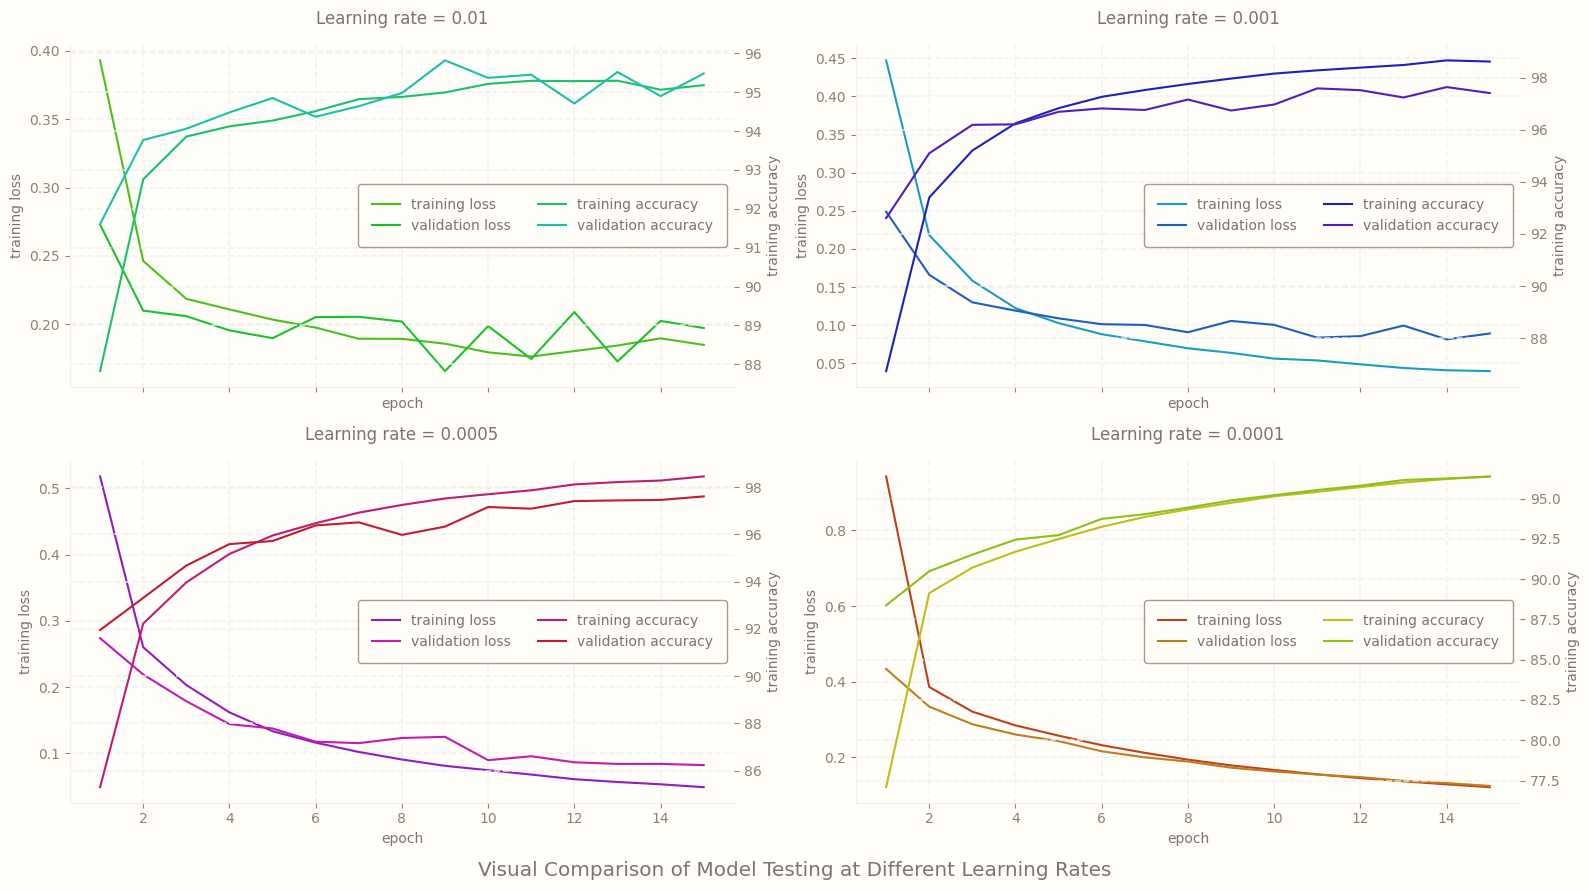

In [20]:
def loader_validation_iterations(lr, criterion):
    criterion = criterion
    val_running_loss = 0.0
    val_running_accu = 0
    with torch.no_grad():
        for val_inputs, val_labels in validation_loader:
            val_inputs = val_inputs.view(val_inputs.shape[0], -1)
            val_outputs = model(val_inputs)
            val_loss = criterion(val_outputs, val_labels)
            _, val_preds = torch.max(val_outputs, 1)
            val_running_loss += val_loss.item()
            val_running_accu += torch.sum(val_preds == val_labels.data)
        else:
            val_epoch_loss = val_running_loss / len(validation_loader)
            val_epoch_accu = val_running_accu.float() / len(validation_loader)
    return val_epoch_loss, val_epoch_accu


def validation_iterations(epochs,
                          lr,
                          criterion=nn.CrossEntropyLoss(),
                          optimizer_type=torch.optim.Adam,
                          **kwargs):
    epochs = epochs
    loss = []
    accu = []
    val_loss = []
    val_accu = []
    for e in range(epochs):
        epoch_loss, epoch_accu = loader_training_iterations(
            lr, criterion, optimizer_type, **kwargs)
        val_epoch_loss, val_epoch_accu = loader_validation_iterations(
            lr, criterion)
        loss.append(epoch_loss)
        accu.append(epoch_accu)
        val_loss.append(val_epoch_loss)
        val_accu.append(val_epoch_accu)
    return loss, accu, val_loss, val_accu


colors = calm_color_generator(16)
plt.rcParams["figure.figsize"] = (figure_size[0], figure_size[1])

fig, axs = plt.subplots(2, 2, sharex=True)

for i in range(2):
    for j in range(2):
        model = Classifier(784, 125, 65, 10)
        loss, accu, val_loss, val_accu = validation_iterations(
            epochs=epochs, lr=lr_list[i * 2 + j])
        line1 = axs[i, j].plot(range(1, epochs + 1),
                               loss,
                               label="training loss",
                               c=colors.pop(0))
        line2 = axs[i, j].plot(range(1, epochs + 1),
                               val_loss,
                               label="validation loss",
                               c=colors.pop(0))
        axs[i, j].set(xlabel="epoch", ylabel="training loss")
        axs[i, j] = axs[i, j].twinx()
        line3 = axs[i, j].plot(range(1, epochs + 1),
                               accu,
                               label="training accuracy",
                               c=colors.pop(0))
        line4 = axs[i, j].plot(range(1, epochs + 1),
                               val_accu,
                               label="validation accuracy",
                               c=colors.pop(0))
        axs[i, j].set(ylabel="training accuracy")
        lines = line1 + line2 + line3 + line4
        labels = [line.get_label() for line in lines]
        axs[i, j].legend(lines,
                         labels,
                         loc="center right",
                         borderpad=1,
                         ncol=2)

for ax, lr in zip(axs.flat, lr_list):
    ax.set_title("Learning rate = {}".format(lr), loc="center", pad=15)

fig.suptitle("Visual Comparison of Model Testing at Different Learning Rates",
             fontsize="x-large",
             x=0.5,
             y=0)

plt.tight_layout()
plt.show()

## Final Tests

In [21]:
url = ("https://images.homedepot-static.com/productImages/"
       "007164ea-d47e-4f66-8d8c-fd9f621984a2/svn/"
       "architectural-mailboxes-house-letters-numbers"
       "-3585b-5-64_1000.jpg")

response = requests.get(url, stream=True)
img = Image.open(response.raw)

tabulation = Form_Generator()
tabulation.heading_printer("Web image grabbing")

statements = [
    """
url = ("https://images.homedepot-static.com/productImages/"
       "007164ea-d47e-4f66-8d8c-fd9f621984a2/svn/"
       "architectural-mailboxes-house-letters-numbers"
       "-3585b-5-64_1000.jpg")

response = requests.get(url, stream=True)
img = Image.open(response.raw)
"""
]
tabulation.statement_generator(statements)

variables = ["response"]
values = [str(response)]
tabulation.variable_generator(variables, values)

expressions = ["np.array(img)", "np.array(img).shape"]
results = [str(reprlib_rules.repr(np.array(img))), str(np.array(img).shape)]
tabulation.expression_generator(expressions, results)

Web image grabbing

    +-------------------------------------------------------------+
    | Statement                                                   |
    +-------------------------------------------------------------+
    | url = ("https://images.homedepot-static.com/productImages/" |
    |        "007164ea-d47e-4f66-8d8c-fd9f621984a2/svn/"          |
    |        "architectural-mailboxes-house-letters-numbers"      |
    |        "-3585b-5-64_1000.jpg")                              |
    |                                                             |
    | response = requests.get(url, stream=True)                   |
    | img = Image.open(response.raw)                              |
    +-------------------------------------------------------------+
    +----------+------------------+
    | Variable | Value            |
    +----------+------------------+
    | response | ⟨Response [200]⟩ |
    +----------+------------------+
    +---------------------+-------------------------

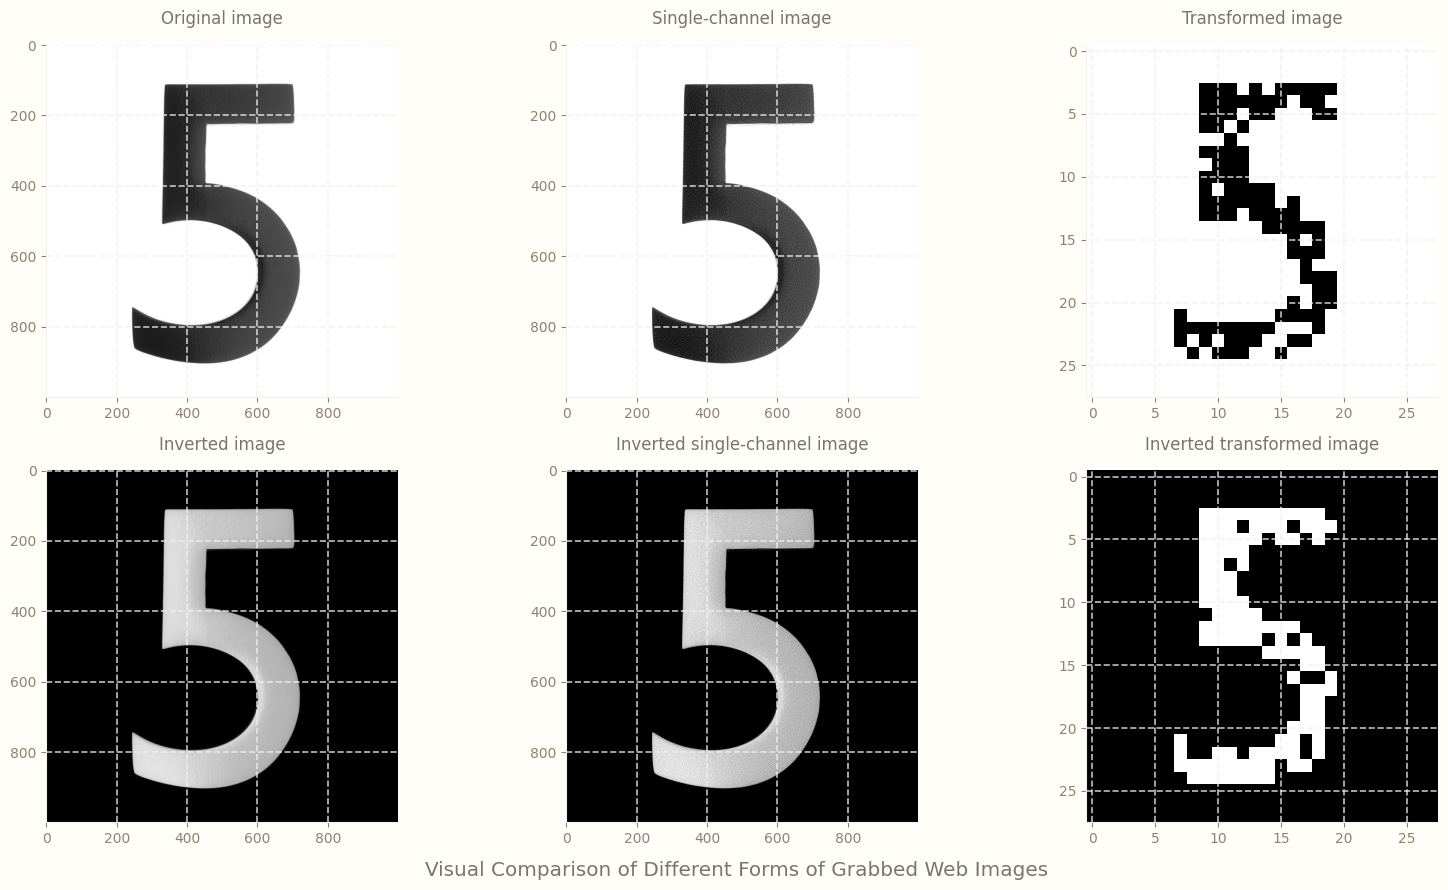

In [22]:
plt.rcParams["figure.figsize"] = (figure_size[0], figure_size[1])

fig, axs = plt.subplots(2, 3)

axs[0, 0].imshow(img)
axs[0, 0].set_title("Original image", loc="center", pad=15)

single_channel_img = img.convert("1")
axs[0, 1].imshow(single_channel_img)
axs[0, 1].set_title("Single-channel image", loc="center", pad=15)

transformed_img = transform(single_channel_img)
axs[0, 2].imshow(im_convert(transformed_img))
axs[0, 2].set_title("Transformed image", loc="center", pad=15)

inverted_img = ImageOps.invert(img)
axs[1, 0].imshow(inverted_img)
axs[1, 0].set_title("Inverted image", loc="center", pad=15)

inverted_single_channel_img = inverted_img.convert("1")
axs[1, 1].imshow(inverted_single_channel_img)
axs[1, 1].set_title("Inverted single-channel image", loc="center", pad=15)

inverted_transformed_img = transform(inverted_single_channel_img)
axs[1, 2].imshow(im_convert(inverted_transformed_img))
axs[1, 2].set_title("Inverted transformed image", loc="center", pad=15)

fig.suptitle("Visual Comparison of Different Forms of Grabbed Web Images",
             fontsize="x-large",
             x=0.5,
             y=0)

plt.tight_layout()
plt.show()

In [23]:
img = ImageOps.invert(img)
img = img.convert("1")
img = transform(img)

img = img.view(img.shape[0], -1)
output = model(img)
_, pred = torch.max(output, 1)

tabulation = Form_Generator()
tabulation.heading_printer(
    "Test of the classification model with web-scraped image")

statements = [
    """
img = ImageOps.invert(img)
img = img.convert("1")
img = transform(img)

img = img.view(img.shape[0], -1)
output = model(img)
_, pred = torch.max(output, 1)
"""
]
tabulation.statement_generator(statements)

variables = ["img", "output", "_", "pred"]
values = [str(reprlib_rules.repr(img)), str(output), str(_), str(pred)]
tabulation.variable_generator(variables, values)

expressions = [
    "img.shape", "torch.max(output, 0)", "torch.max(output, 1)", "pred.item()"
]
results = [
    str(img.shape),
    str(torch.max(output, 0)),
    str(torch.max(output, 1)),
    str(pred.item())
]
tabulation.expression_generator(expressions, results)

Test of the classification model with web-scraped image

    +----------------------------------+
    | Statement                        |
    +----------------------------------+
    | img = ImageOps.invert(img)       |
    | img = img.convert("1")           |
    | img = transform(img)             |
    |                                  |
    | img = img.view(img.shape[0], -1) |
    | output = model(img)              |
    | _, pred = torch.max(output, 1)   |
    +----------------------------------+
    +----------+--------------------------------------------------+
    | Variable | Value                                            |
    +----------+--------------------------------------------------+
    | img      | tensor([[-1., -1., -1., -1., -1., -1., -1., -1., |
    |          |         -1., -1., -1., -1., -1., -1.,            |
    |          |          -1., -1., -1., -1., -1., -1., -1.,      |
    |          |         ...1., -1., -1., -1., -1., -1., -1.,     |
    |          |

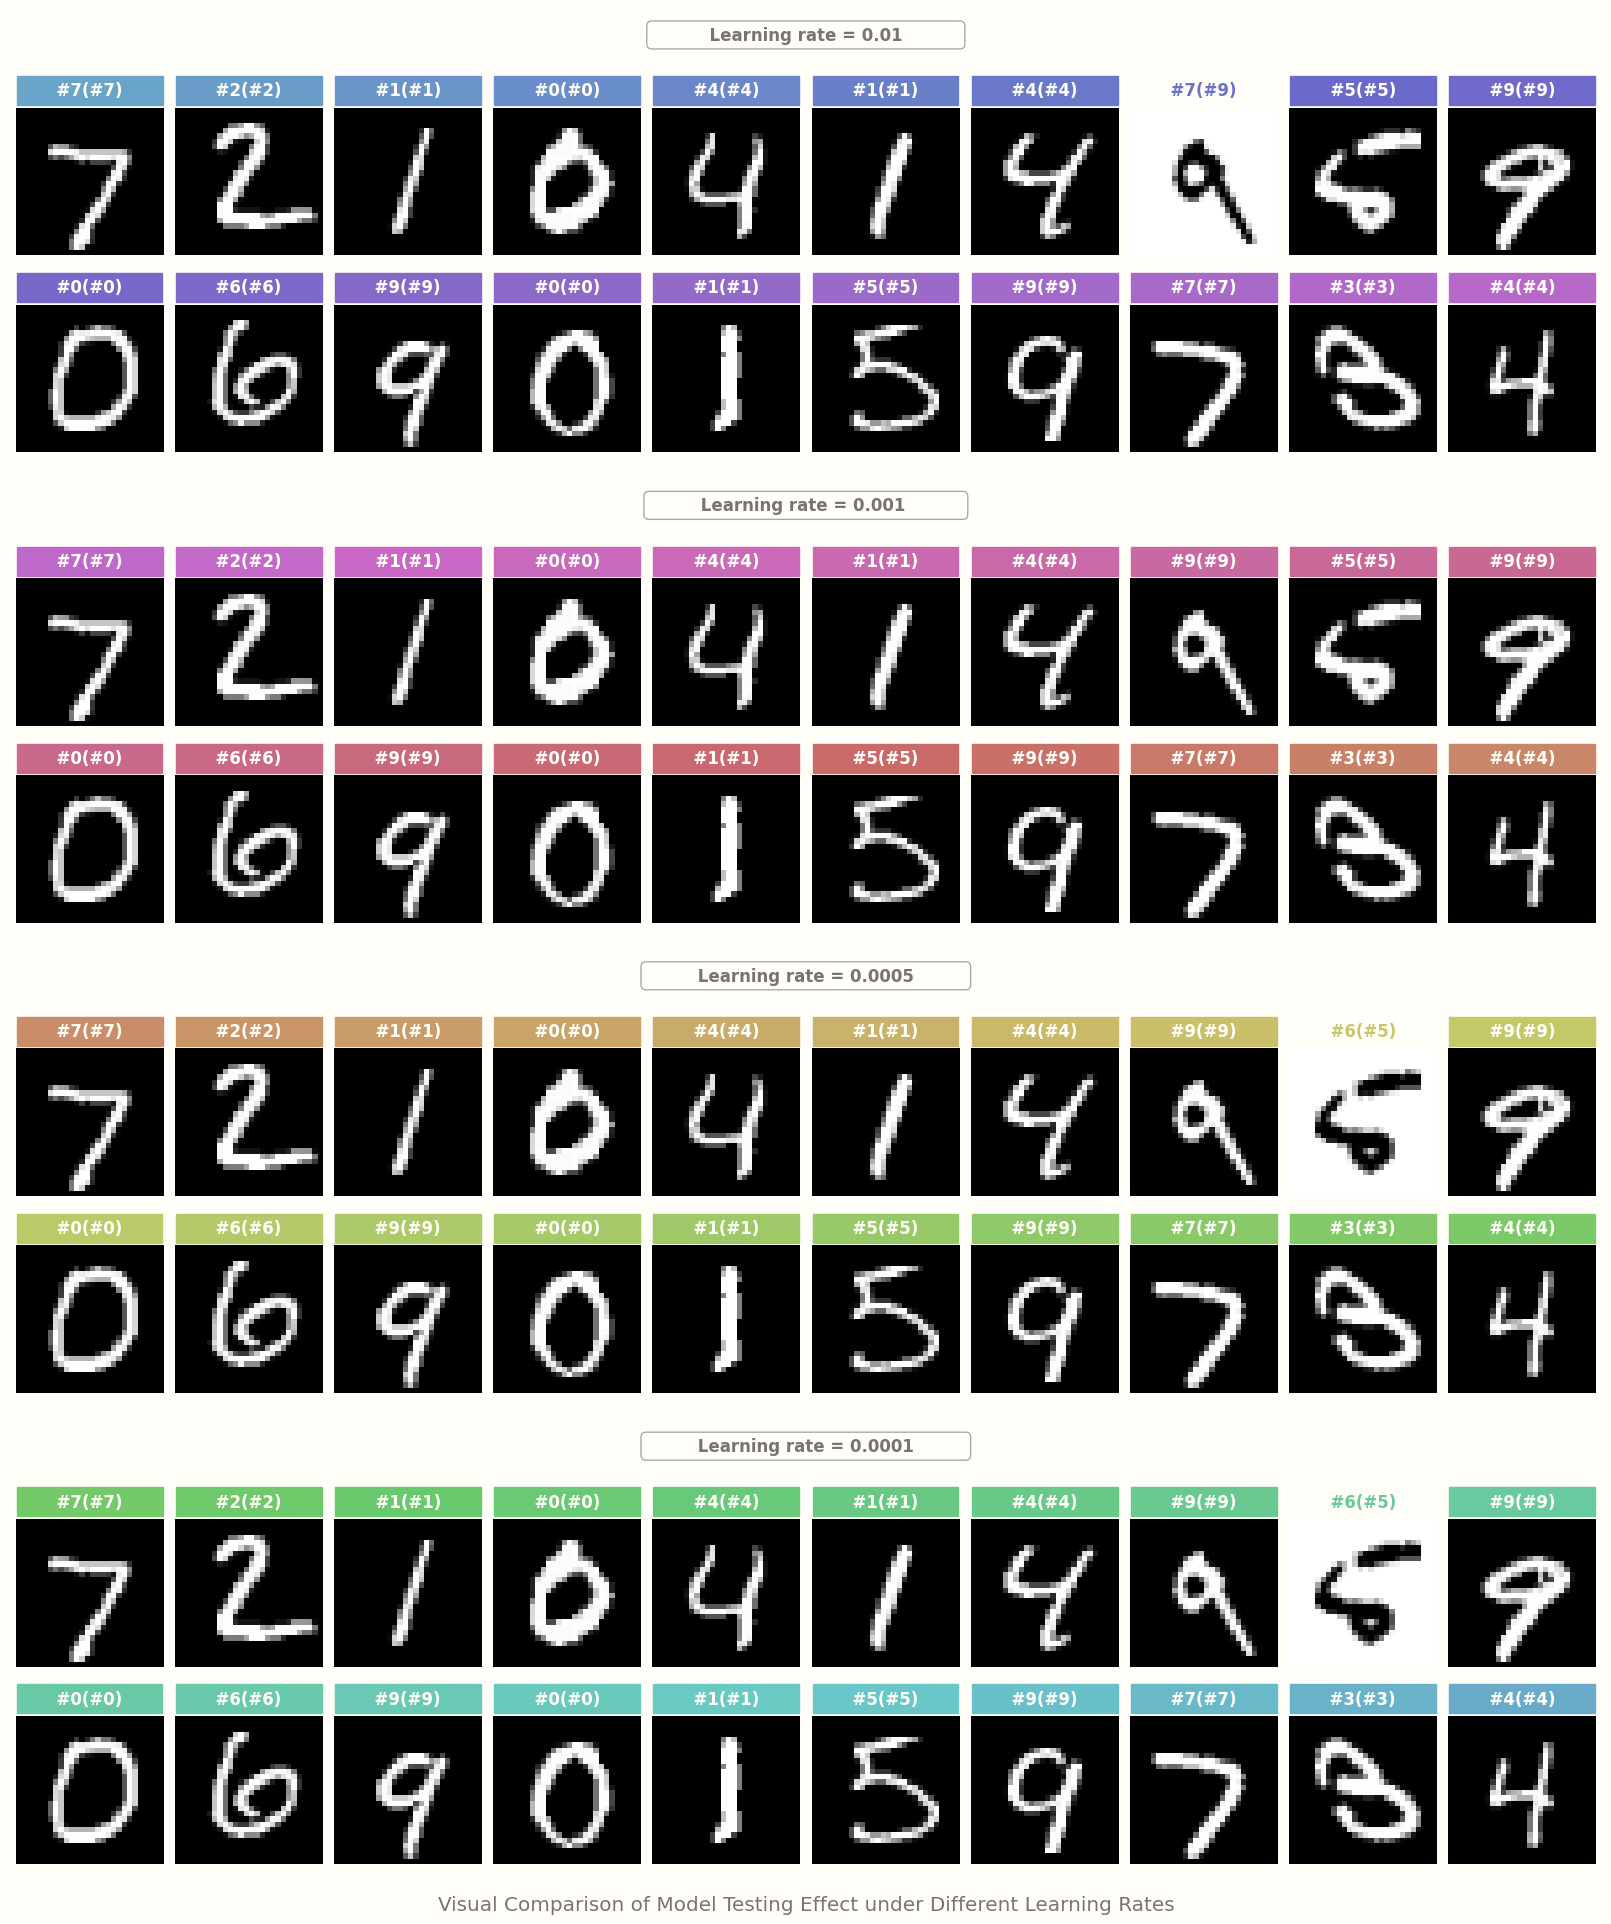

In [24]:
colors = calm_color_generator(80)
fig = plt.figure(figsize=(figure_size[0], figure_size[1] * 2),
                 constrained_layout=True)

gs = gridspec.GridSpec(nrows=4, ncols=1, figure=fig, wspace=None, hspace=.2)

bbox_props = dict(boxstyle="round",
                  fc=plt.rcParams["axes.facecolor"],
                  ec="0.5",
                  alpha=0.67)

dataiter = iter(validation_loader)
images, labels = next(dataiter)
images_ = images.view(images.shape[0], -1)

for idx, lr in zip(np.arange(4), lr_list):
    model = Classifier(784, 125, 65, 10)
    validation_iterations(epochs=epochs, lr=lr)
    outputs = model(images_)
    _, preds = torch.max(outputs, 1)
    title = "Learning rate = {}".format(lr).center(40, " ")
    ax = fig.add_subplot(gs[idx], xticks=[], yticks=[], frameon=False)
    ax.set_title(title,
                 y=.875,
                 loc="center",
                 pad=0,
                 fontweight="heavy",
                 bbox=bbox_props)

    for k in range(20):
        bgcolor = colors.pop(0)
        spaces = " " * 6
        exec(f"axins{k} = ax.inset_axes([0.1 * (k % 10), -0.8 * (k // 10), \
        0.1, 0.6])")
        exec(f"axins{k}.set(xticks=[], yticks=[], frame_on=False)")
        exec(f"axins{k}.imshow(im_convert(images[k])) if preds[k] == \
        labels[k] else axins{k}.imshow(image_to_scalar_data(images[k]), \
        cmap=\"binary\")")
        exec(f"axins{k}.set_title(\
        \"{spaces}#{str(preds[k].item())}(#{str(labels[k].item())}){spaces}\", \
        y=1.025, loc=\"center\", color=(plt.rcParams[\"axes.facecolor\"] \
        if preds[k] == labels[k] else bgcolor), backgroundcolor=(bgcolor \
        if preds[k] == labels[k] else plt.rcParams[\"axes.facecolor\"]), \
        fontweight=\"bold\")")

fig.suptitle(
    "Visual Comparison of Model Testing Effect under Different Learning Rates",
    fontsize="x-large",
    x=0.5,
    y=-0.05)

plt.show()